### Required Packages

In [54]:
from matplotlib import pyplot as plt
import numpy as np
import random
import plotly.express as px
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

In [62]:
import numpy as np
import matplotlib
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                [s[0][1] for s in spam],
                s = 100,
                color = 'cyan',
                edgecolor = 'k',
                marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                [s[0][1] for s in ham],
                s = 100,
                color = 'red',
                edgecolor = 'k',
                marker = 's')
    pyplot.xlabel('aack')
    pyplot.ylabel('beep')
    pyplot.legend(['happy','sad'])
    
def draw_line(a,b,c, color='black', linewidth=2.0, linestyle='solid', starting=0, ending=3):
    x = np.linspace(starting, ending, 1000)
    pyplot.plot(x, -c/b - a*x/b, linestyle=linestyle, color=color, linewidth=linewidth)

### Define Data 

In [55]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

In [56]:
features_df = pd.DataFrame({'X1': features[:,0], 'X2': features[:,1], 'Y': labels})

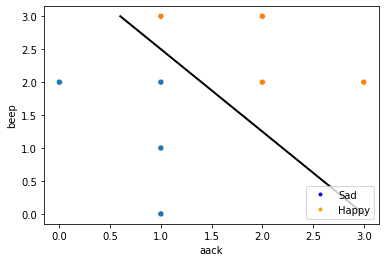

In [57]:
custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
        Line2D([], [], marker='.', color='orange', linestyle='None')]

sns.scatterplot(data=features_df, x='X1', y='X2', hue='Y')
plt.legend(custom,['Sad', 'Happy'],loc="lower right")
plt.xlabel('aack')
plt.ylabel('beep')
plt.plot([0.6, 3.0], [3.0, 0], linewidth=2, c='black')
plt.show()

### Perception Algorithm

In [58]:
def step_function(x):
    if x >= 0:
        return 1
    return 0

# w*x+c
def score(w, c, x):
    return x.dot(w) + c

def predict(w, c, x):
    return step_function(score(w, c, x))

def error(w, c, x, label):
    pred = predict(w, c, x)
    
    if pred == label:
        return 0
    return np.abs(score(w, c, x))

def average_error(w, c, x, labels):
    total_error = 0
    for i in range(len(x)):
        total_error += error(w, c, x[i], labels[i])
    return total_error/len(x)

In [59]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    pred = predict(weights, bias, features)
    error = label-pred
    for i in range(len(weights)):
        weights[i] += (error)*features[i]*learning_rate
    bias += (error)*learning_rate
    return weights, bias

In [63]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    for epoch in range(epochs):
        draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
        error = average_error(weights, bias, features, labels)
        errors.append(error)
        i = random.randint(0, len(features)-1)
        weights, bias = perceptron_trick(weights, bias, features[i], labels[i])
    draw_line(weights[0], weights[1], bias)
    plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

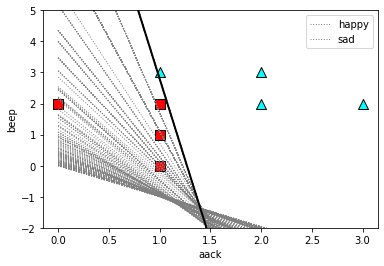

([0.5199999999999996, 0.049999999999999364], -0.6600000000000004)

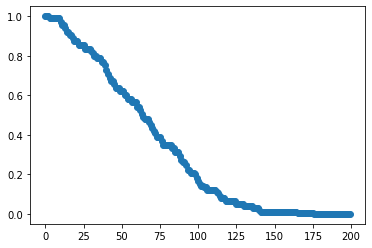

In [64]:
perceptron_algorithm(features, labels)

### Using Sklearn

In [65]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(features, labels)

Perceptron()

In [66]:
clf.score(features, labels)

1.0

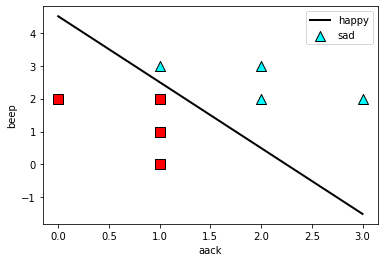

In [67]:
weights = clf.coef_
bias = clf.intercept_
draw_line(weights[0][0], weights[0][1], bias)
plot_points(features, labels)
plt.show()